In [1]:
import networkx as nx
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import time

from aux_functions import *
from generation import generation as gen
from local_search import local_search as ls

n, quota, matrix, dataset = load_dataset('problems/instances/A1/symmetric/10.1.in')

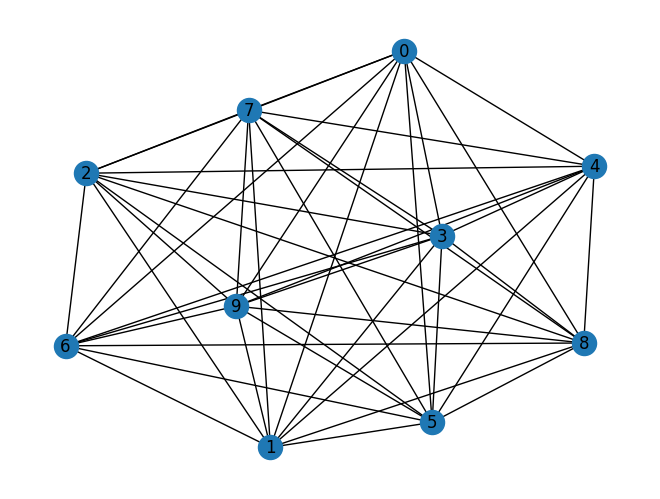

In [2]:

A = np.matrix(matrix,dtype=float)

G = nx.from_numpy_matrix(A)

for i in G.nodes:
    G.nodes[i]['bonus'] = dataset[i].bonus
    G.nodes[i]['penalty'] =  dataset[i].penalty
    G.nodes[i]['id'] = dataset[i].id

nx.draw(G, with_labels=True)

Finished in 1.6483 seconds
Cost: 967.0
Bonus Colected: 3133.0


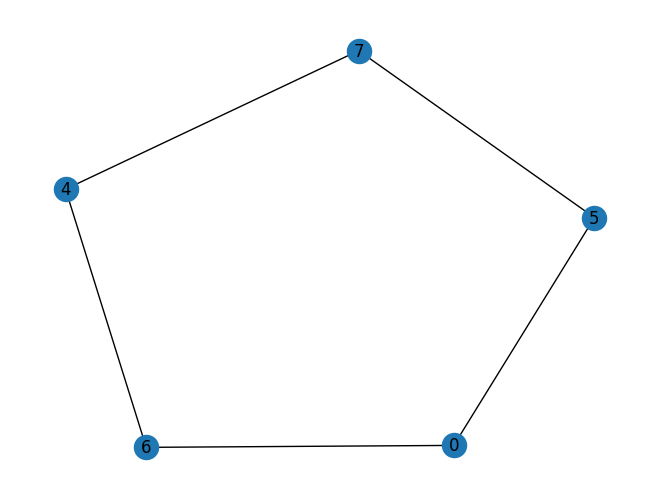

In [3]:
# MEMETICO

start_time = time.perf_counter()
route = gen.memetic_algorithm(G, quota)
finish_time = time.perf_counter()
cost = route_cost(route, G)

duration = finish_time - start_time
report(duration, route, G)
plot(route, G)

Finished in 1.6298 seconds
Cost: 1019.0
Bonus Colected: 3099.0


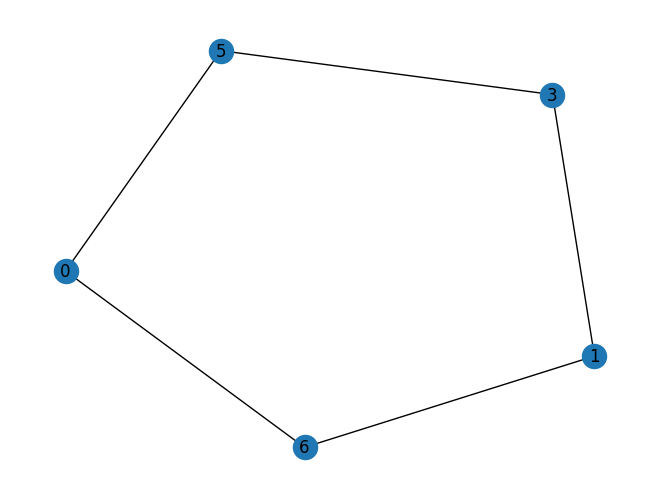

In [4]:
# GENETICO

start_time = time.perf_counter()
route = gen.genetic_algorithm(G, quota)
finish_time = time.perf_counter()
cost = route_cost(route, G)

duration = finish_time - start_time
report(duration, route, G)
plot(route, G)

Finished in 4.4479 seconds
Cost: 937.0
Bonus Colected: 3233.0


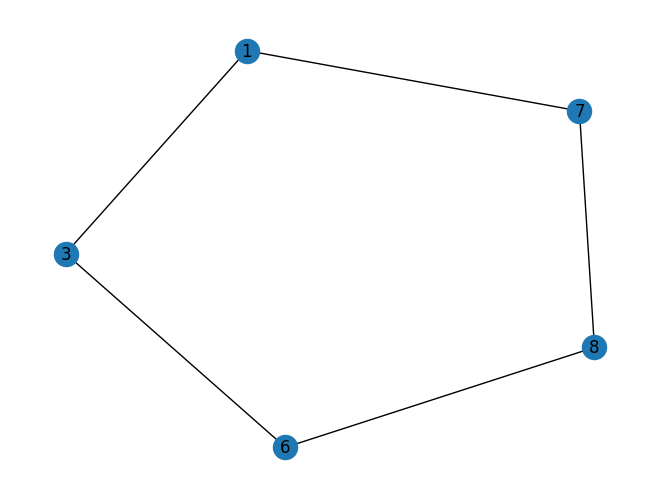

In [5]:
# GRASP

start_time = time.perf_counter()

route = gen.grasp_algorithm(quota, G)
    
finish_time = time.perf_counter()
duration = finish_time - start_time
report(duration, route, G)
plot(route, G)



In [6]:
# iterations = 5000
# k_itr = 100
# k = k_itr

# best_route = route
# best_cost = route_cost(route, G)


# alfa1 = []
# alfa2 = []
# alfa3 = []
# alfa4 = []

# grasp_solutions = []


# alfas = [0.1, 0.2, 0.3, 0.4]
# weights = [1, 1, 1, 1]

# count1 = 0

# tic = time.perf_counter()

# for i in range(iterations):
#     # i+=1
#     alfa_grasp = random.choices(alfas, weights=weights, k=1)[0]

 
#     grasp_counter_start = time.perf_counter()
#     route = gen.grasp_construction(G, quota, alfa_grasp)
#     grasp_counter_end = time.perf_counter()
    
#     if(route in grasp_solutions):
#         count1+=1
#         continue
#     grasp_solutions.append(route)


#     # ls_counter_start = time.perf_counter()
#     route = ls.drop_step(route, quota, G)

#     route = ls.swap_2_opt(route, G, my_pos)
#     # ls_counter_end = time.perf_counter()

#     cost = route_cost(route, G)

#     if(alfa_grasp == alfas[0]):
#         alfa1.append(cost)
#     if(alfa_grasp == alfas[1]):
#         alfa2.append(cost)
#     if(alfa_grasp == alfas[2]):
#         alfa3.append(cost)
#     if(alfa_grasp == alfas[3]):
#         alfa4.append(cost)

#     # print(f"GRASP Finished in {grasp_counter_end - grasp_counter_start:0.4f} seconds")
#     # print(f"LOCAL SEARCH Finished in {ls_counter_end - ls_counter_start:0.4f} seconds")

#     if(cost < best_cost):
#         best_route = route
#         best_cost = cost
#         alfa_best = alfa_grasp

#     if(i == k):
#         # plt.plot(alfas, weights)

#         # plt.xlabel('Valores de Alfa')
#         # plt.ylabel('Pesos')
#         # plt.show()
#         alfa1_av = sum(alfa1) / len(alfa1)
#         alfa2_av = sum(alfa2) / len(alfa2)
#         alfa3_av = sum(alfa3) / len(alfa3)
#         alfa4_av = sum(alfa4) / len(alfa4)

#         q1 = best_cost/alfa1_av
#         q2 = best_cost/alfa2_av
#         q3 = best_cost/alfa3_av
#         q4 = best_cost/alfa4_av
#         q_total = q1+q2+q3+q4
#         weights = [q1/q_total, q2/q_total, q3/q_total, q4/q_total]
#         k += k_itr 
        
    
    
# toc = time.perf_counter()
# print(f"Finished in {toc - tic:0.4f} seconds")

# print(weights)
# # print('alfa_best',alfa_best)


# alfa1_av = sum(alfa1) / len(alfa1)
# alfa2_av = sum(alfa2) / len(alfa2)
# alfa3_av = sum(alfa3) / len(alfa3)
# alfa4_av = sum(alfa4) / len(alfa4)

# plt.plot(alfas,[alfa1_av, alfa2_av, alfa3_av, alfa4_av])

# plt.xlabel('Valores de Alfa')
# plt.ylabel('Custos')
# plt.show()

# plt.figure()
# route_edges = [ (best_route[i-1]['id'],best_route[i]['id']) for i in range(len(best_route)) ]
# nx.draw(G.edge_subgraph(route_edges), pos=my_pos, with_labels=True)

# cost = route_cost(route, G)
# bonus = calculate_bonus_colected(route, G)
# print('cost', cost)
# print('bonus', bonus)



In [7]:
# cost = route_cost(route, G)
# bonus = calculate_bonus_colected(route, G)
# print('cost', cost)
# print('bonus', bonus)